In [1]:
%%time
import keras


Using TensorFlow backend.


Wall time: 51.7 s


In [2]:
keras.__version__


'2.2.4'

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.utils import np_utils

In [4]:
import numpy as np
import matplotlib.pyplot as plt

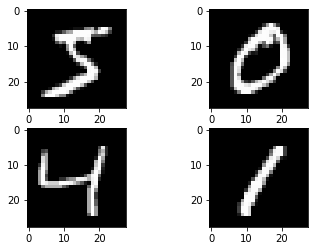

In [5]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [6]:
# fix random seed for reproducibility
seed = 0

In [7]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
model = baseline_model()
# Fit the model
h = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 7s - loss: 0.2828 - accuracy: 0.9193 - val_loss: 0.1472 - val_accuracy: 0.9552
Epoch 2/10
60000/60000 - 3s - loss: 0.1109 - accuracy: 0.9679 - val_loss: 0.0971 - val_accuracy: 0.9695
Epoch 3/10
60000/60000 - 3s - loss: 0.0718 - accuracy: 0.9790 - val_loss: 0.0775 - val_accuracy: 0.9761
Epoch 4/10
60000/60000 - 3s - loss: 0.0495 - accuracy: 0.9859 - val_loss: 0.0701 - val_accuracy: 0.9785
Epoch 5/10
60000/60000 - 4s - loss: 0.0356 - accuracy: 0.9896 - val_loss: 0.0618 - val_accuracy: 0.9805
Epoch 6/10
60000/60000 - 3s - loss: 0.0261 - accuracy: 0.9931 - val_loss: 0.0630 - val_accuracy: 0.9804
Epoch 7/10
60000/60000 - 3s - loss: 0.0195 - accuracy: 0.9951 - val_loss: 0.0634 - val_accuracy: 0.9805
Epoch 8/10
60000/60000 - 4s - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.0569 - val_accuracy: 0.9819
Epoch 9/10
60000/60000 - 4s - loss: 0.0105 - accuracy: 0.9979 - val_loss: 0.0645 - val_accuracy: 0.9815
Epoch 10/10
60

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


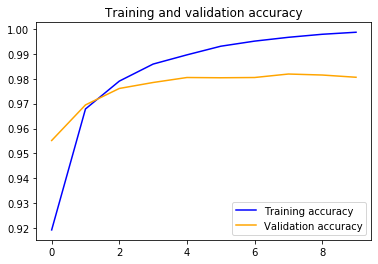

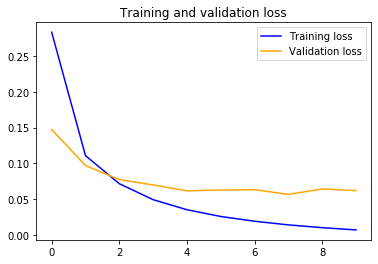

In [13]:
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'blue', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()